Необходимо предсказать риск проблем с сердцем (колонка output) на основе данных (необходима регистрация на kaggle). 
Можно использовать материалы ноутбука занятия и наработки сообщества (вкладка Code) - но не бездумно копировать!
Задание на отлично: рассмотреть не только knn, но и другие классификаторы, попробовать обучить несколько из них и сравнить полученный результат по метрикам качества на тесте.

Критерии, по которым проверяется работа:
Выполнена ли загрузка данных? (корректно ли загружен файл, все ли загрузилось и в правильном ли формате)
Есть ли первичное исследование? (аномалии, пропуски, корректность заполнения)
Есть ли основное исследование (EDA)? (баланс классов, линейные корреляции, группировки с целевым, тезисные выводы словами)
Есть ли предобработка? (кодирование данных - one-hot/label encoder, нормализация, train/val/test или train/test split, стратификация по балансировке)
Есть ли обучение алгоритма и перебор гиперпараметров? (grid search и не только, обучение алгоритма c лучшими параметрами)
Есть ли оценка алгоритма? (Разные метрики качества? Интерпретация ошибок)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Разархивирум архив
! unzip archive.zip

Archive:  archive.zip
replace heart.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: heart.csv               
replace o2Saturation.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: o2Saturation.csv        


In [ ]:
# читаем csv файл
df = pd.read_csv('/content/heart.csv')
df


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:

df.columns
# удалим дубликаты
df.drop_duplicates(inplace=True)
# age - возраст
# sex - пол
# cp - Тип боли в груди 
# trtbps - артериальное давление в состоянии покоя (в мм рт. ст.)
# chol - холесторал в мг / дл, полученный с помощью датчика ИМТ
# fbs - (уровень сахара в крови натощак> 120 мг / дл) (1 = верно; 0 = неверно)
# restecg - результаты электрокардиографии в покое
# thalachh - достигнута максимальная частота сердечных сокращений
# exng - стенокардия, вызванная физической нагрузкой (1 = да; 0 = нет)
# oldpeak - Предыдущий пик
# slp - Склон
# caa - количество крупных судов (0-3)
# thall - Скорость Thal
# output - Целевая переменная

In [ ]:
# смотрим, типы колонок и есть ли в них пустые значения
# все значения во всех колонках заполнены, т.к.  количество non-null значений для каждой
#  колонки == количеству значений в колонке, исходя из этого делаем вывод, что пустых значений нет
df.info()
# так же мы можем увидеть, что все колонки числового типа данных,
#  что позволяет нам сделать вывод, что заполнены они корректно

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [ ]:
# общая информайия ( мин макс среднее количество и тд)
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# баланс классов целевой переменной
df['output'].value_counts()

1    164
0    138
Name: output, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2905c07450>,
      dtype=object)

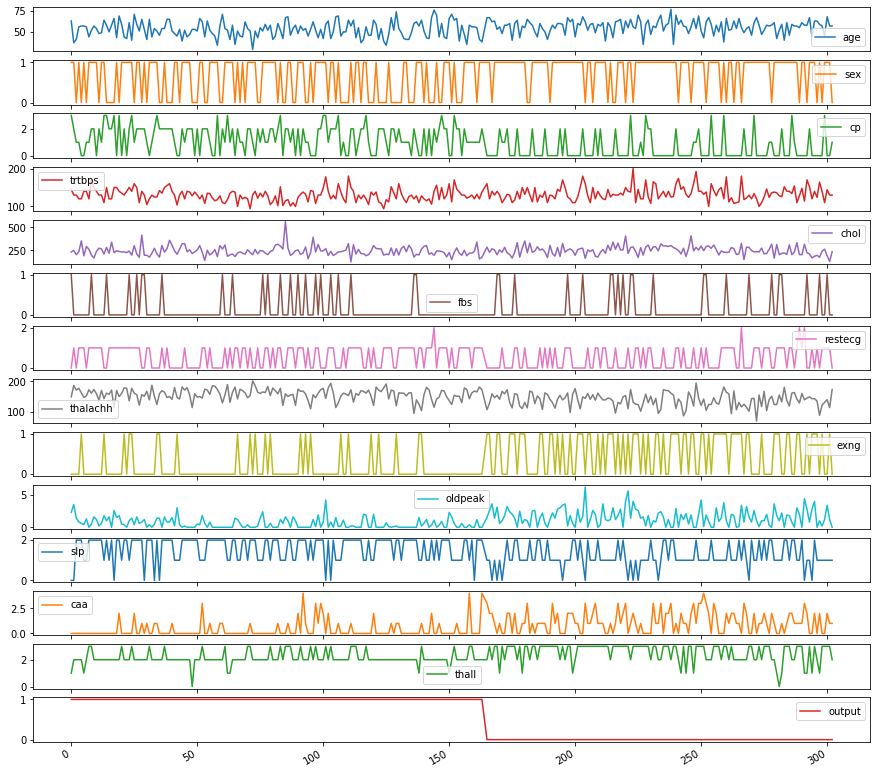

In [ ]:
# посмотрим наглядно на наши данные
df.plot(subplots=True, figsize = (15, 15))

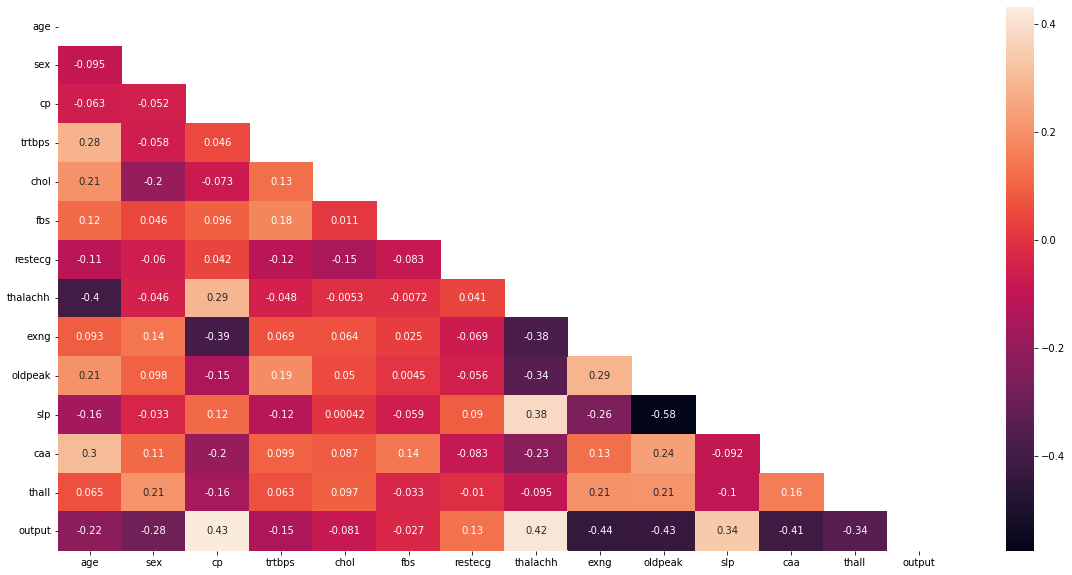

In [ ]:
# смотрим матрицу корреляции, чтобы найти зависимости
plt.figure(figsize=(20, 10))
matrix=np.triu(df.corr())
sns.heatmap(df.corr(),annot=True,mask=matrix)

# сильно коррелируют oldpeak && slp - отрицательная зависимость
# output && cp, output && thalachh - положительная зависимость
# в случае с колонкой cp - нужно нормализовать данные
# зависимость output && thalachh мы рассмотрим ниже с помощью box plot

In [ ]:
# посмотрим так же на таблицу сопряженности колонок, 
# зависимость которых мы увидели на матрице корреляции
pd.crosstab(df['output'], df['thalachh'], margins=True)

thalachh,71,88,90,95,96,97,99,103,105,106,108,109,111,112,113,114,115,116,117,118,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,136,137,138,139,140,...,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,177,178,179,180,181,182,184,185,186,187,188,190,192,194,195,202,All
output,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,1,1,2,2,1,2,2,2,2,1,2,1,1,1,1,3,0,1,1,1,5,3,1,1,1,3,2,6,1,1,2,0,1,1,4,...,1,2,2,3,1,3,1,4,2,3,2,1,2,1,0,2,2,1,1,0,2,2,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,138
1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,2,1,0,0,0,1,3,1,0,2,1,0,0,0,1,2,1,1,0,0,1,2,1,2,...,2,3,2,3,4,3,3,5,3,8,7,1,3,2,1,3,4,4,3,7,5,3,3,0,5,5,2,1,4,1,1,2,1,1,1,1,1,0,1,164
All,1,1,1,1,2,1,1,2,3,1,2,2,3,2,1,3,3,2,1,1,3,1,4,2,1,7,4,1,1,1,4,4,7,2,1,2,1,3,2,6,...,3,5,4,6,5,6,4,9,5,11,9,2,5,3,1,5,6,5,4,7,7,5,3,1,5,5,2,2,5,1,1,2,1,1,1,1,1,1,1,302


In [ ]:
# сейчас посмотрим на баланс классов в колонках

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


1    164
0    138
Name: output, dtype: int64

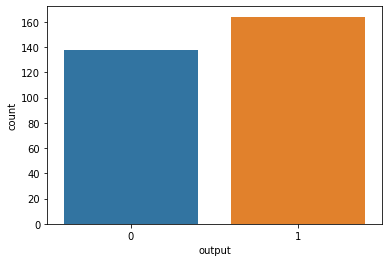

In [ ]:
# наглядно на графике посмотрим на соотношение значений в колонке output
sns.countplot(df['output']);
df['output'].value_counts()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


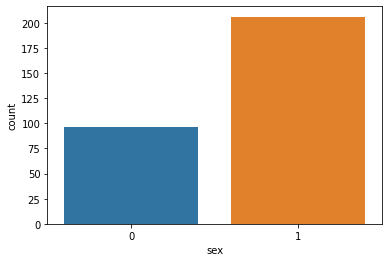

In [ ]:
# отношение мужчин и женщин в таблице
sns.countplot(df['sex']);
# 0 - females
# 1 - male


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


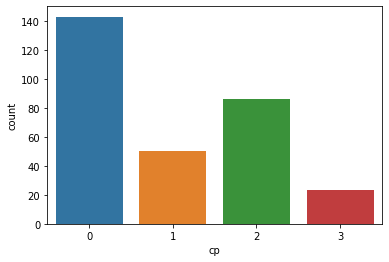

In [ ]:
# график типов боли в груди
sns.countplot(df['cp']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


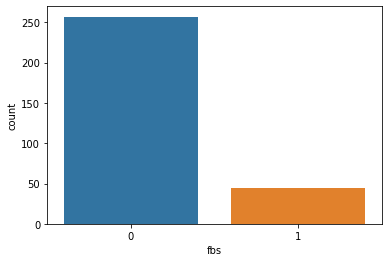

In [ ]:
# уровень сахара в крови 
sns.countplot(df['fbs']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


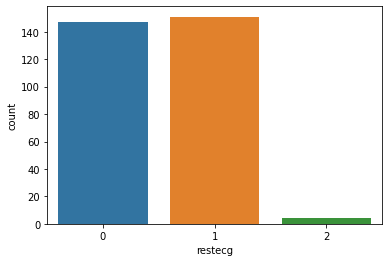

In [ ]:
# результаты электокардиографии 
sns.countplot(df['restecg']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


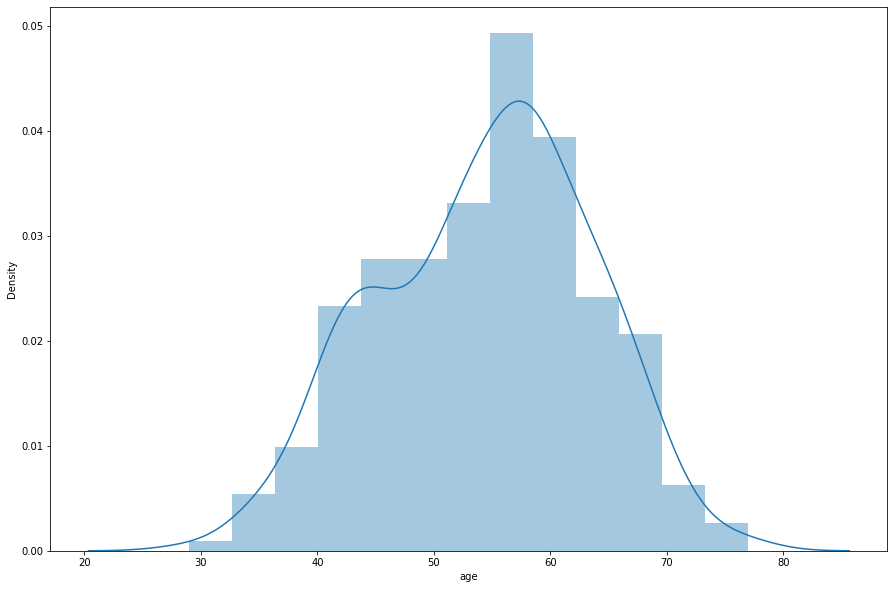

In [ ]:
#  на этом графике мы можем наблюдать максимальную частоту сердечных сокращений у пациентов
plt.figure(figsize = (15, 10))
sns.distplot(df['age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


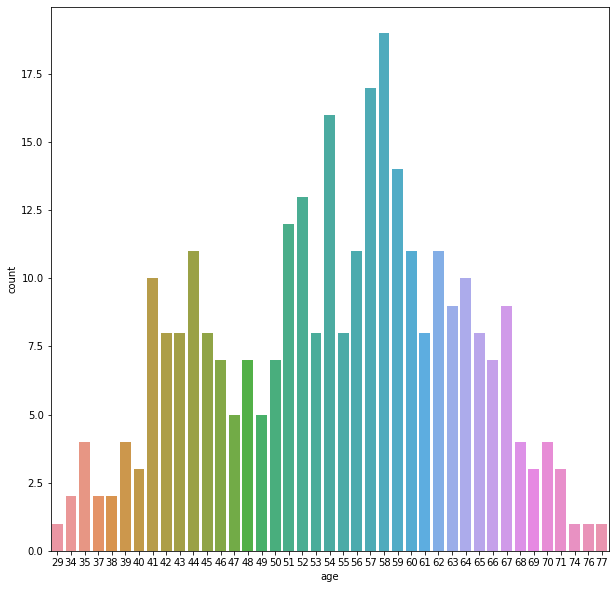

In [ ]:
#  возраст пациентов
plt.figure(figsize = (10, 10))
sns.countplot(df['age'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


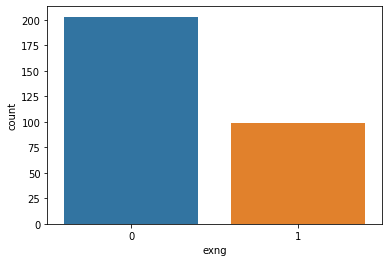

In [ ]:
# стенокардия, вызванная физической нагрузкой
sns.countplot(df['exng']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


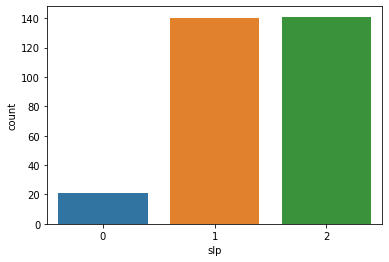

In [ ]:
#  склон
sns.countplot(df['slp']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


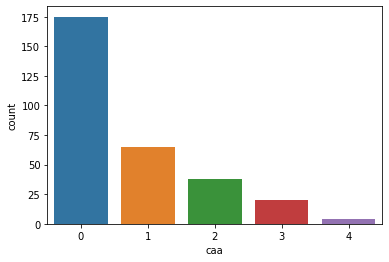

In [ ]:
# количество крупных сосудов
sns.countplot(df['caa']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


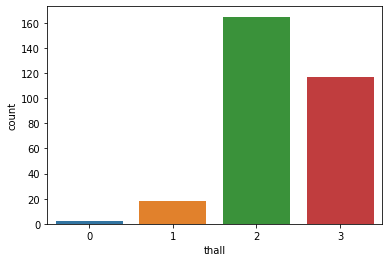

In [ ]:
# скорость thall
sns.countplot(df['thall']);

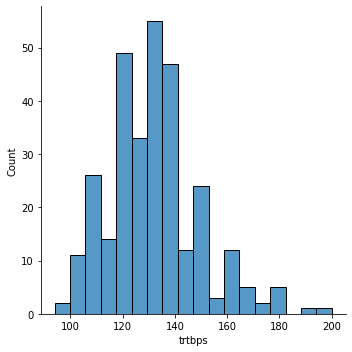

In [ ]:
# график артериального давления в состоянии покоя
sns.displot(df['trtbps'])

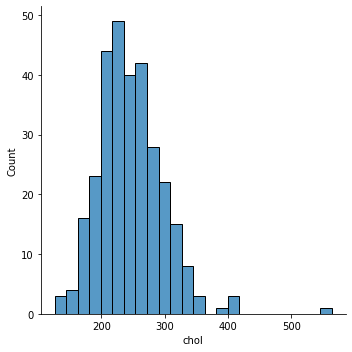

In [ ]:
# холестерин
sns.displot(df['chol'])

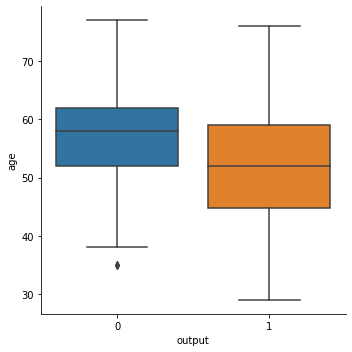

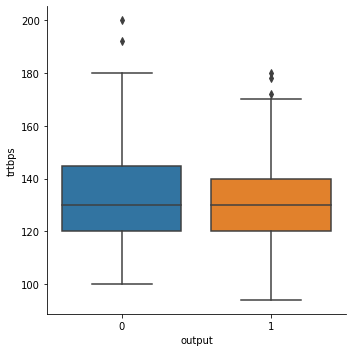

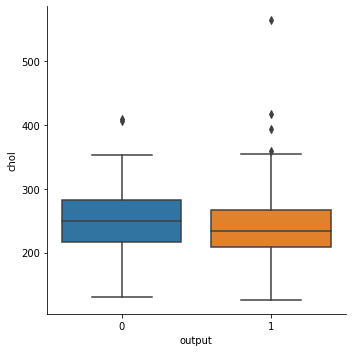

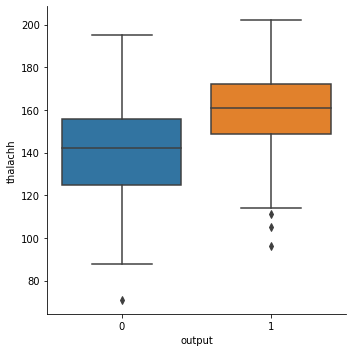

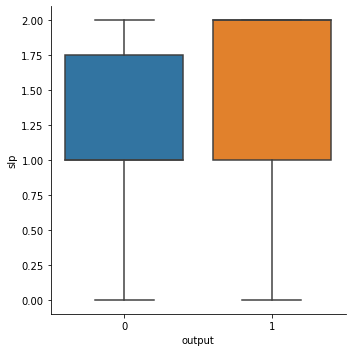

In [ ]:
# способ визуального представления групп числовых данных через квартили
# посмотрим, как интерквартальный размах распределения колонки output выглядит в сравнении с другими колонками
sns.catplot(data=df,x='output',y='age',kind='box')
sns.catplot(data=df,x='output',y='trtbps',kind='box')
sns.catplot(data=df,x='output',y='chol',kind='box')
sns.catplot(data=df,x='output',y='thalachh',kind='box')
sns.catplot(data=df,x='output',y='slp',kind='box')


In [ ]:
# исходя из предыдущих графиков, можно заметить сильно выдялющиеся значения - вбросы
# заменим наши явные выбросы на медианы 
def emissions(col):
  q1 = df[col].quantile(q=0.25)
  q3 = df[col].quantile(q=0.75)
  k = 1.5
  iqr = q3-q1
  l = q1 - k * iqr
  u = q3 + k * iqr
  i = df[(df[col] < l)|(df[col] > u)][col].index
  df.loc[i, col] = df[col].mean()

col = ['chol', 'thalachh', 'trtbps']
for c in col:
  emissions(c)


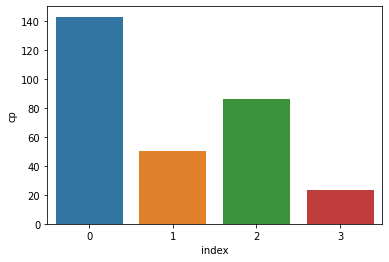

In [ ]:
chest_pain=df['cp'].value_counts().reset_index()
sns.barplot(data=chest_pain,x='index',y='cp')
#  тут можно увидеть, что боль в груди имеет значение 

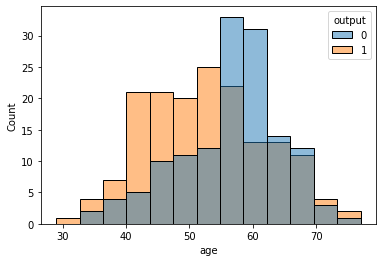

In [ ]:
sns.histplot(data=df,x='age',hue='output')
# график, показывающий зависимость возраста и заболевания

In [ ]:
# собираем результаты
classifiers=[]

In [ ]:

df_out = df.copy()
df_out['output'] = df['output'].apply((lambda x: x==1))
df_out.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,True
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,True
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,True
3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,True
4,57,0,0,120.0,354.0,0,1,163.0,1,0.6,2,0,2,True


In [ ]:
# числовые колонки
df_out._get_numeric_data().columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [ ]:
x=np.asanyarray(df[['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','thalachh','exng','oldpeak','slp','caa','thall']])
y=np.asanyarray(df[['output']])

In [ ]:
x

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [ ]:
# y

In [ ]:
x.shape, y.shape

((302, 14), (302, 1))

In [ ]:
from sklearn.model_selection import train_test_split # функция разделения на train test

#  создаем 4 части данных, которые будут использоваться для подгонки прогнозирующих значений 
# X_train - все независимые переменные, которые будут использоваться для обучения модели
# X_test - оставшаяся часть независимых переменных из данных, которые не будут использоваться 
# на этапе обучения и будут использоваться для составления прогнозов для проверки точности модели
# y_train - зависимая переменная, которая должна быть предсказана моделью
# y_test - данные имеют метки категорий для ваших тестовых данных, эти метки будут 
# использоваться для проверки точности между фактическими и прогнозируемыми категориями.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score # доля верно угаданных ответов
from sklearn import metrics

In [ ]:
#  KNN метод k-ближайших соседей
#  запускаем алгоритм knn несколько раз (1-11) с разными соответственно значениями
knn = []
for i in range(1, 11):
  k = KNeighborsClassifier(n_neighbors=i).fit(x_train,y_train)
  knn.append(k)

y_list = []
for i in knn:
  y_hat = i.predict(x_test)
  y_list.append(y_hat)

metr = []
for i in knn:
  metrix = metrics.accuracy_score(y_test, i.predict(x_test))
  metr.append(metrix)




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-

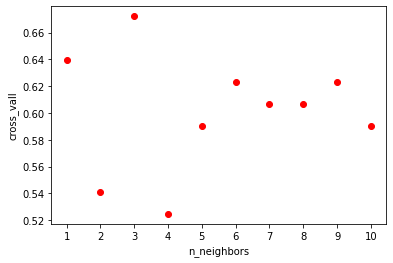

In [ ]:
#  метки, которые у нас получились
for a,b in enumerate(metr):
    plt.scatter(x=a+1,y=b,color='r')
plt.xticks(np.arange(1,11))
plt.xlabel('n_neighbors',fontsize=10)
plt.ylabel('cross_vall',fontsize=10);

In [ ]:
#  по предыдущему графику выбираем метку, которая дала наилучший результат
# показатели нас устраивают
from sklearn.metrics import classification_report
class_1=knn[4] 
result_1=class_1.predict(x_test)
print(classification_report(y_test,result_1))
classifiers.append(class_1)

              precision    recall  f1-score   support

           0       0.44      0.50      0.47        22
           1       0.69      0.64      0.67        39

    accuracy                           0.59        61
   macro avg       0.57      0.57      0.57        61
weighted avg       0.60      0.59      0.60        61



In [ ]:
class_1

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# Логистическая регрессия
from sklearn.linear_model import LogisticRegression
class_2=LogisticRegression(C=.01, solver='liblinear')
class_2.fit(x_train,y_train)
classifiers.append(class_2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
classifiers

[KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                      weights='uniform'),
 LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                    warm_start=False)]

In [ ]:
result_2=class_2.predict(x_test)
new_result=class_2.predict_proba(x_test)
new_result

array([[0.5481106 , 0.4518894 ],
       [0.64280673, 0.35719327],
       [0.82695968, 0.17304032],
       [0.3772065 , 0.6227935 ],
       [0.6554751 , 0.3445249 ],
       [0.28320342, 0.71679658],
       [0.32986602, 0.67013398],
       [0.88465233, 0.11534767],
       [0.41958925, 0.58041075],
       [0.19590107, 0.80409893],
       [0.33135013, 0.66864987],
       [0.64698762, 0.35301238],
       [0.23347454, 0.76652546],
       [0.43066347, 0.56933653],
       [0.22545855, 0.77454145],
       [0.78109317, 0.21890683],
       [0.19757003, 0.80242997],
       [0.1694638 , 0.8305362 ],
       [0.70628713, 0.29371287],
       [0.50881782, 0.49118218],
       [0.43290376, 0.56709624],
       [0.31908055, 0.68091945],
       [0.93424452, 0.06575548],
       [0.75657622, 0.24342378],
       [0.235955  , 0.764045  ],
       [0.14110321, 0.85889679],
       [0.18616704, 0.81383296],
       [0.36815126, 0.63184874],
       [0.40411825, 0.59588175],
       [0.72008663, 0.27991337],
       [0.

In [ ]:
# посмотрим точность классификатора
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,result_2))

              precision    recall  f1-score   support

           0       0.61      0.64      0.62        22
           1       0.79      0.77      0.78        39

    accuracy                           0.72        61
   macro avg       0.70      0.70      0.70        61
weighted avg       0.72      0.72      0.72        61



In [ ]:
# SVC
from sklearn import svm
class_3=svm.SVC()
class_3.fit(x_train,y_train)
classifiers.append(class_3)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
result_3=class_3.predict(x_test)

In [ ]:
print(classification_report(y_test,result_3))

              precision    recall  f1-score   support

           0       0.56      0.45      0.50        22
           1       0.72      0.79      0.76        39

    accuracy                           0.67        61
   macro avg       0.64      0.62      0.63        61
weighted avg       0.66      0.67      0.66        61



In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
class_4=DecisionTreeClassifier()
class_4.fit(x_train,y_train)
classifiers.append(class_4)

In [ ]:
#  посмотрим точность
result_4=class_4.predict(x_test)
print(classification_report(y_test,result_4))

              precision    recall  f1-score   support

           0       0.56      0.64      0.60        22
           1       0.78      0.72      0.75        39

    accuracy                           0.69        61
   macro avg       0.67      0.68      0.67        61
weighted avg       0.70      0.69      0.69        61



In [ ]:
# ориентироваться в большей степени нужно на f1-scorе, 
accuracy_score(y_test,class_4.predict(x_test))
# f1-score - 2 * (recall * precision/(precision + recall))

0.6885245901639344

{'classifier 1': 0.5901639344262295, 'classifier 2': 0.7213114754098361, 'classifier 3': 0.6721311475409836, 'classifier 4': 0.6885245901639344}


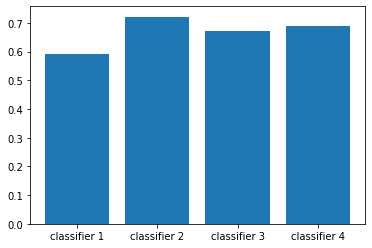

In [ ]:
# посмотрим результаты 
#  на этом графике видим, что более точный результат нам предсказла логистическая регрессия,
#  но остальные результаты тоже ничего
classifiers_result={}
for i,classifier in enumerate(classifiers):
    classifiers_result['classifier '+str(i+1)]=accuracy_score(y_test,classifier.predict(x_test))
print(classifiers_result)
plt.bar(range(len(classifiers_result)), list(classifiers_result.values()), align='center')
plt.xticks(range(len(classifiers_result)), list(classifiers_result.keys()));

In [ ]:
# кросс валидация
# берем метку с самым высоким прогнозом
from sklearn.model_selection import GridSearchCV
knn_grid = {'n_neighbors': np.array(np.linspace(20, 50, 10), dtype='int')}
gs = GridSearchCV(knn[4], knn_grid, cv=5, n_jobs=-1)
gs.fit(x, y.reshape(y.shape[0]))

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': array([20, 23, 26, 30, 33, 36, 40, 43, 46, 50])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
pd.DataFrame(gs.cv_results_)
#  посмотрим на результаты для 5 разных выборок данных
# видим, что split3_test_score показал наилучшие результаты

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001087,0.000106,0.007552,0.003958,20,{'n_neighbors': 20},0.622951,0.590164,0.700000,0.750000,0.550000,0.642623,0.072856,6
1,0.000982,0.000033,0.006753,0.002851,23,{'n_neighbors': 23},0.606557,0.622951,0.683333,0.716667,0.583333,0.642568,0.049685,7
2,0.001017,0.000064,0.006042,0.001514,26,{'n_neighbors': 26},0.639344,0.622951,0.650000,0.766667,0.583333,0.652459,0.061434,3
3,0.000965,0.000058,0.005318,0.000222,30,{'n_neighbors': 30},0.655738,0.573770,0.666667,0.766667,0.566667,0.645902,0.072929,5
4,0.001594,0.001143,0.006415,0.002232,33,{'n_neighbors': 33},0.688525,0.622951,0.666667,0.716667,0.600000,0.658962,0.042512,2
5,0.000954,0.000053,0.005124,0.000056,36,{'n_neighbors': 36},0.672131,0.573770,0.666667,0.683333,0.583333,0.635847,0.047186,10
6,0.000907,0.000043,0.005995,0.000735,40,{'n_neighbors': 40},0.672131,0.622951,0.666667,0.666667,0.566667,0.639016,0.040295,9
7,0.000914,0.000044,0.006011,0.000779,43,{'n_neighbors': 43},0.688525,0.606557,0.683333,0.683333,0.583333,0.649016,0.044796,4
8,0.000970,0.000070,0.006358,0.000840,46,{'n_neighbors': 46},0.704918,0.672131,0.666667,0.716667,0.566667,0.665410,0.052887,1
9,0.000918,0.000065,0.005268,0.000598,50,{'n_neighbors': 50},0.688525,0.590164,0.666667,0.700000,0.566667,0.642404,0.053848,8


In [ ]:
# создадтим функцию для удобного вывода графиков
def grid_plot(x, y, x_label, title, y_label='cross_val'):
    plt.figure(figsize=(12, 6))
    plt.grid(True)
    plt.plot(x, y, 'go-')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

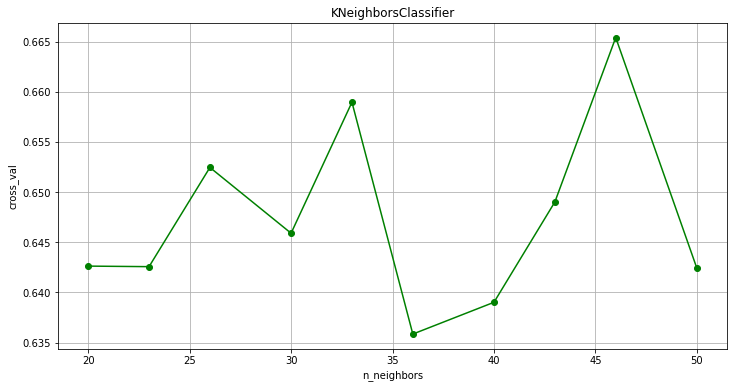

In [ ]:
grid_plot(knn_grid['n_neighbors'], gs.cv_results_['mean_test_score'], 'n_neighbors', 'KNeighborsClassifier')

In [ ]:
# максимально точный результат показывает предпоследняя выборка

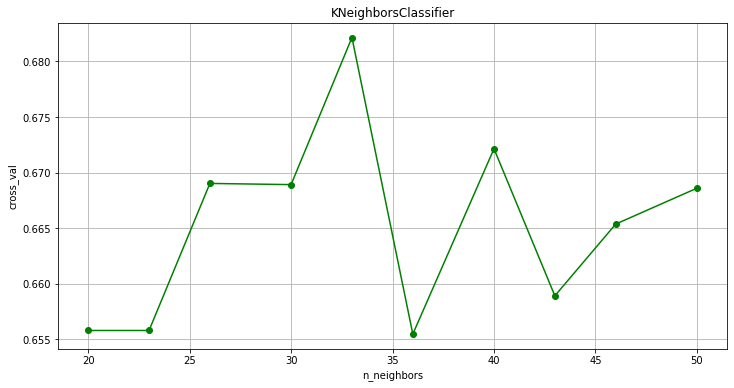

In [ ]:
#  а здесь разделим наши данные на 10 частей по тем же срезам массива
# так же берем метку, которая показала наилучший результат
knn_grid = {'n_neighbors': np.array(np.linspace(20, 50, 10), dtype='int')}
gs = GridSearchCV(knn[4], knn_grid, cv=10)
gs.fit(x, y.reshape(y.shape[0]))
grid_plot(knn_grid['n_neighbors'], gs.cv_results_['mean_test_score'], 'n_neighbors', 'KNeighborsClassifier')

In [ ]:
pd.DataFrame(gs.cv_results_)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000780,0.000189,0.002699,0.000755,20,{'n_neighbors': 20},0.677419,0.580645,0.566667,0.733333,0.800000,0.566667,0.700000,0.800000,0.433333,0.700000,0.655806,0.110907,9
1,0.000620,0.000015,0.001991,0.000055,23,{'n_neighbors': 23},0.741935,0.516129,0.533333,0.766667,0.800000,0.566667,0.700000,0.766667,0.466667,0.700000,0.655806,0.116157,8
2,0.000608,0.000006,0.001984,0.000032,26,{'n_neighbors': 26},0.709677,0.580645,0.633333,0.733333,0.766667,0.600000,0.700000,0.766667,0.500000,0.700000,0.669032,0.083183,3
3,0.000639,0.000066,0.002080,0.000140,30,{'n_neighbors': 30},0.741935,0.580645,0.533333,0.766667,0.733333,0.566667,0.700000,0.833333,0.533333,0.700000,0.668925,0.101496,4
4,0.000620,0.000007,0.002029,0.000046,33,{'n_neighbors': 33},0.741935,0.612903,0.633333,0.800000,0.766667,0.566667,0.700000,0.800000,0.600000,0.600000,0.682151,0.085338,1
5,0.000625,0.000011,0.002074,0.000047,36,{'n_neighbors': 36},0.741935,0.612903,0.600000,0.633333,0.766667,0.533333,0.666667,0.800000,0.566667,0.633333,0.655484,0.083383,10
6,0.000682,0.000098,0.002485,0.000522,40,{'n_neighbors': 40},0.741935,0.612903,0.633333,0.666667,0.800000,0.566667,0.700000,0.766667,0.600000,0.633333,0.672151,0.073356,2
7,0.000624,0.000024,0.002110,0.000082,43,{'n_neighbors': 43},0.709677,0.612903,0.600000,0.700000,0.800000,0.600000,0.666667,0.733333,0.566667,0.600000,0.658925,0.071280,7
8,0.000616,0.000009,0.002087,0.000021,46,{'n_neighbors': 46},0.741935,0.645161,0.566667,0.700000,0.800000,0.600000,0.700000,0.733333,0.566667,0.600000,0.665376,0.077100,6
9,0.000666,0.000060,0.002178,0.000073,50,{'n_neighbors': 50},0.741935,0.677419,0.633333,0.733333,0.766667,0.566667,0.700000,0.733333,0.566667,0.566667,0.668602,0.075402,5


In [ ]:
#  из этой таблицы и графика мы видим, что split4_test_score дала наиболее высокий результат прогноза